In [1]:
# only adjust settings in this cell
state = 'MT' 
year = 2020
enumeration_limit = 10

In [2]:
import sys, os
src_path = os.path.abspath(os.path.join('..', '..', 'src'))
sys.path.append(src_path)

In [3]:
filepath = '../../dat/' + str(year) + '/'
filename = state + '_county.json'
filename2 = state + '_county.shp'

In [4]:
from read import read_graph_from_json
import networkx as nx

G = read_graph_from_json(state, filepath + filename, year=year)
print(f"The state of {state} has {G._k} districts.")
ideal_population = sum(G.nodes[i]['TOTPOP'] for i in G.nodes) / G._k

The state of MT has 2 districts.


In [5]:
from optimization import generate_plans_with_refinement

plans, first_feasible_dev = generate_plans_with_refinement(G, ideal_population, state, year, enumeration_limit)


*****************************************
Trying deviation = 0.5.
*****************************************
Set parameter Username
Set parameter LicenseID to value 2608266
Academic license - for non-commercial use only - expires 2026-01-09
Total time = 58.5

*****************************************
Trying deviation = 1.0.
*****************************************
Total time = 0.0

*****************************************
Trying deviation = 2.0.
*****************************************
Total time = 30.3

*****************************************
Trying deviation = 4.0.
*****************************************
Total time = 16.46

*****************************************
Trying deviation = 8.0.
*****************************************
Total time = 9.3

*****************************************
Trying deviation = 16.0.
*****************************************
Total time = 5.64

*****************************************
Trying deviation = 32.0.
**************************************

In [6]:
no_solution_region = [0, first_feasible_dev] if first_feasible_dev > 0.5 else None
print(f"No feasible solution was found within the region: {no_solution_region}")

No feasible solution was found within the region: None


***************************************
obj_type = cut_edges
***************************************
Pareto front objective values: [[0.5, 24], [1.5, 23], [3.5, 22], [4.5, 20], [18.5, 15], [1134.5, 14], [2160.5, 13], [2708.5, 10]]


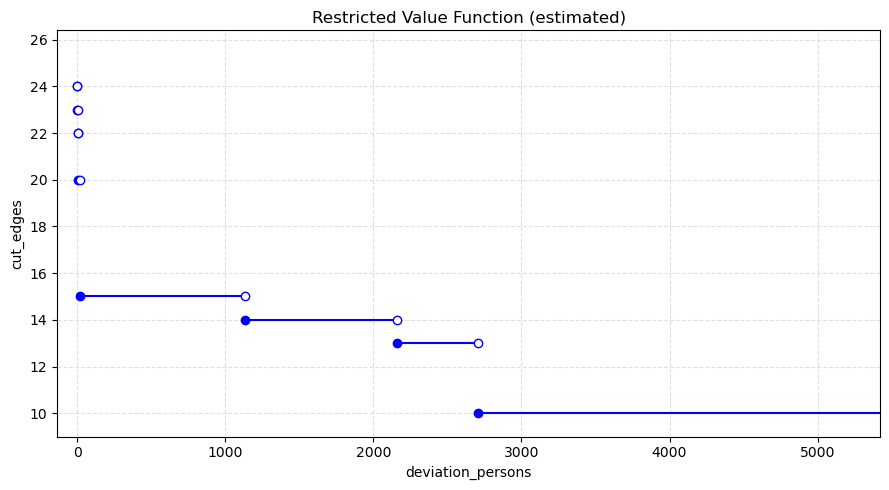

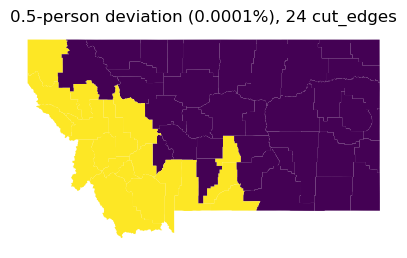

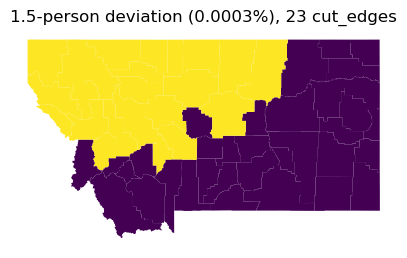

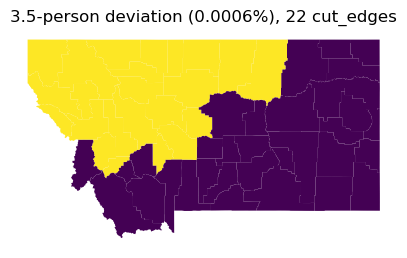

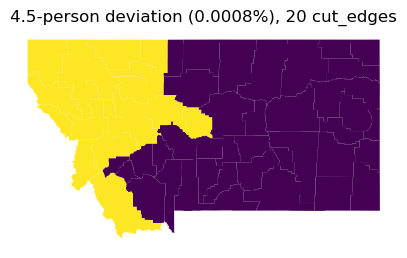

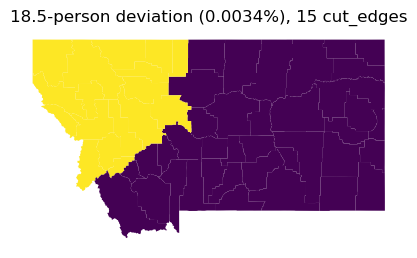

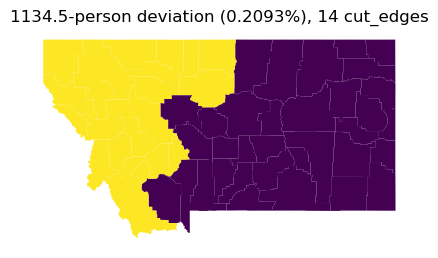

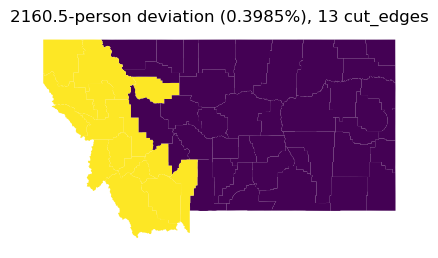

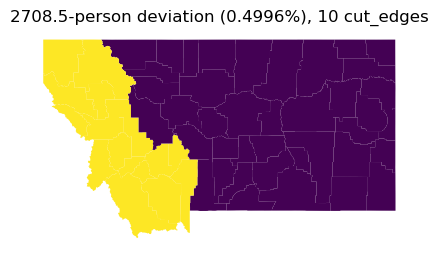

***************************************
obj_type = perimeter
***************************************
Pareto front objective values: [[0.5, 61.76321202431628], [1.5, 61.54509756836176], [3.5, 60.7281797121718], [4.5, 56.82989152093229], [18.5, 49.990061035247514], [1977.5, 49.20314865891479], [2911.5, 48.718800810860444]]


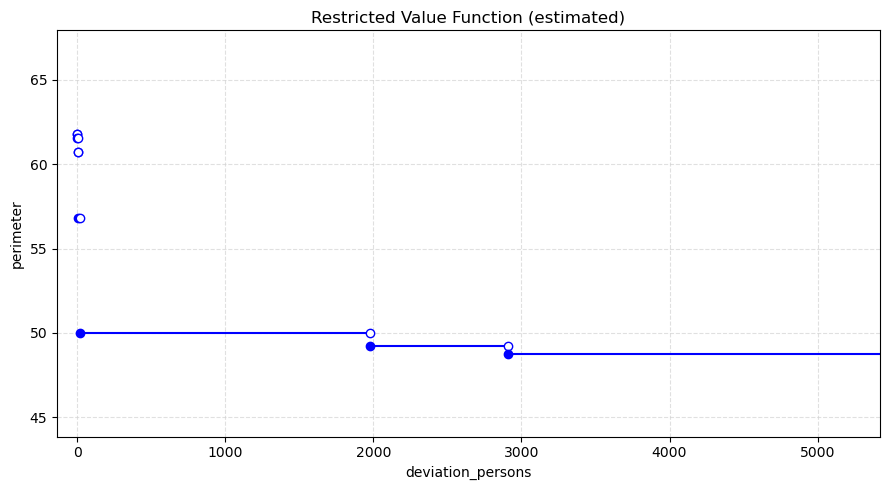

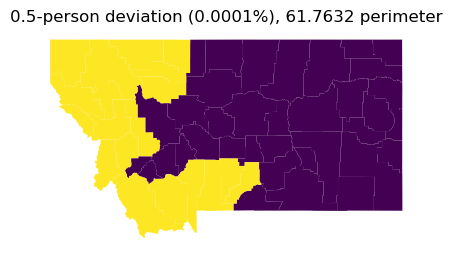

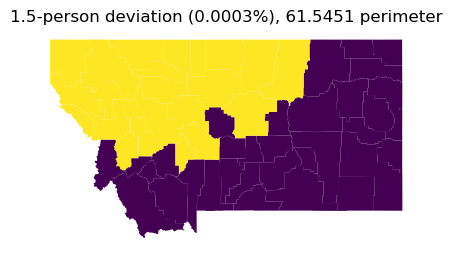

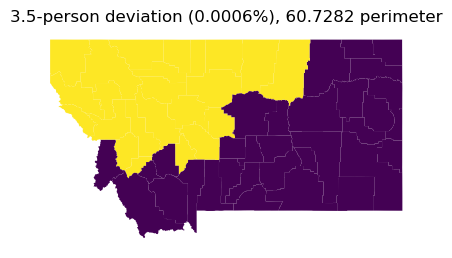

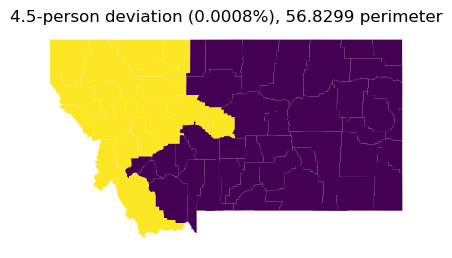

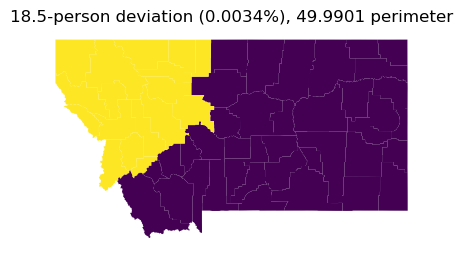

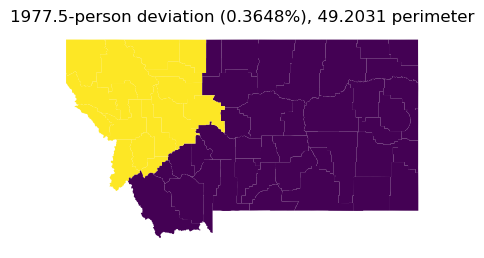

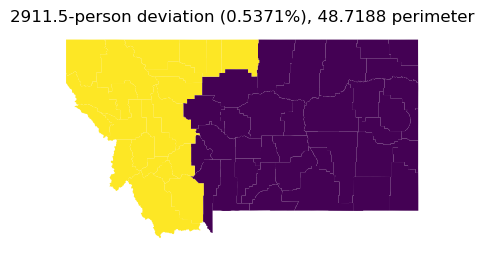

***************************************
obj_type = inverse_Polsby_Popper
***************************************
Pareto front objective values: [[0.5, 4.549106233043892], [1.5, 3.9608287723947138], [3.5, 3.856592803684794], [4.5, 3.843828782759064], [18.5, 2.81054019347793], [1977.5, 2.7285018036017226]]


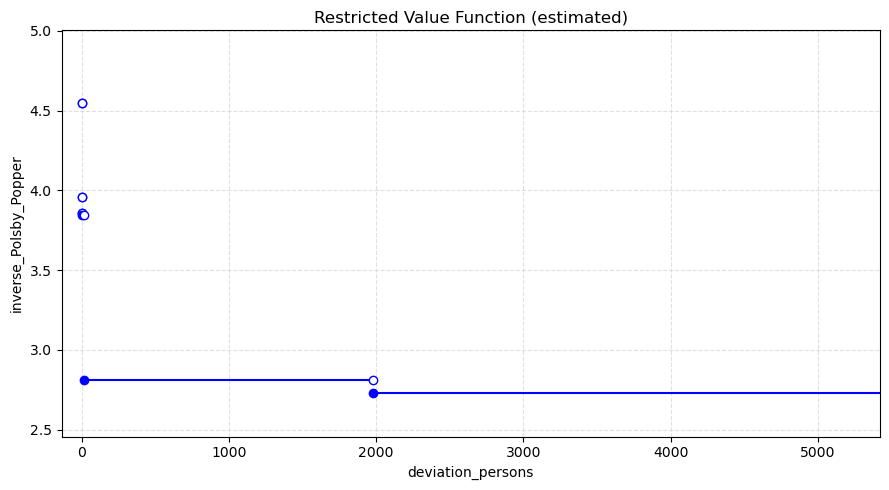

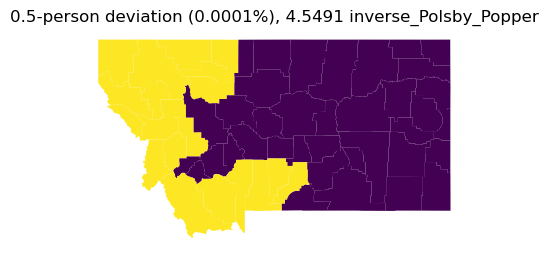

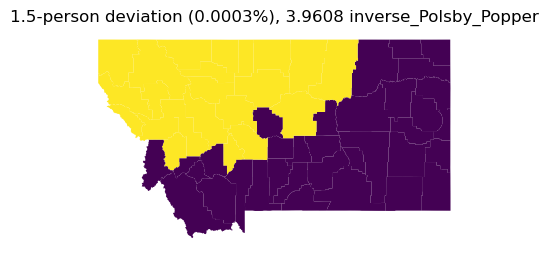

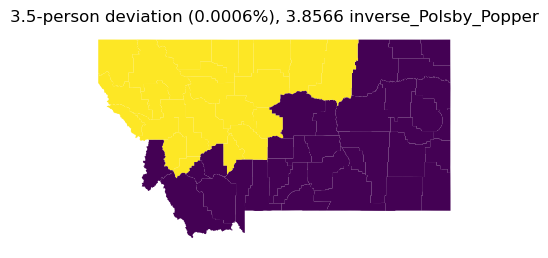

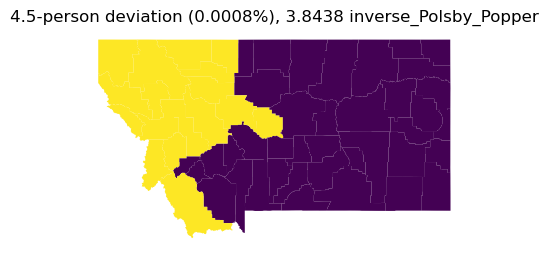

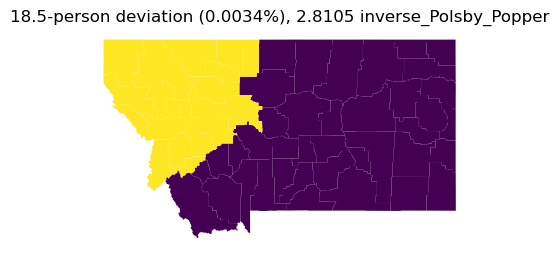

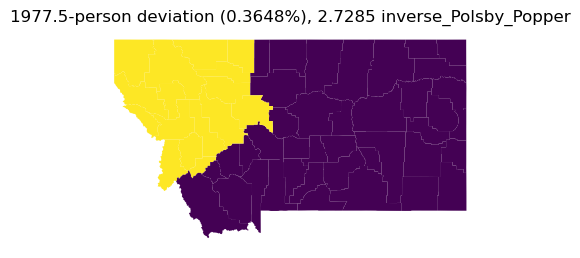

***************************************
obj_type = average_Polsby_Popper
***************************************
Pareto front objective values: [[0.5, 0.26010672853883254], [1.5, 0.2602601469583188], [3.5, 0.2655727061323769], [4.5, 0.29107978635732634], [18.5, 0.35799952400721285], [1977.5, 0.36800378794963906], [2708.5, 0.3715773559086848], [2911.5, 0.41055561756090525]]


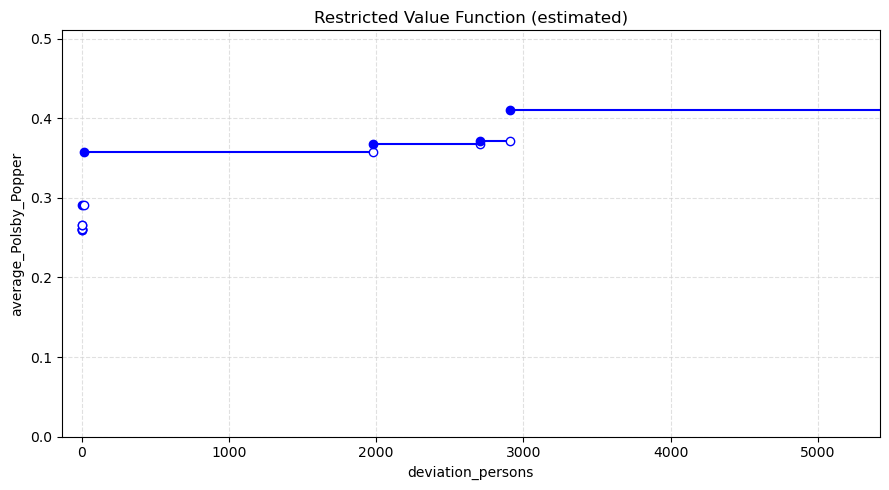

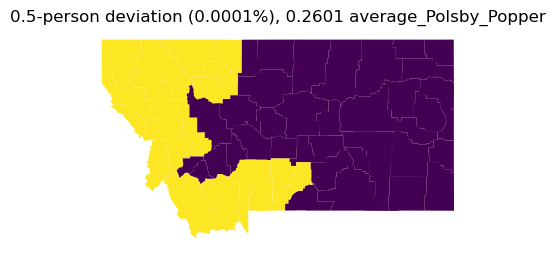

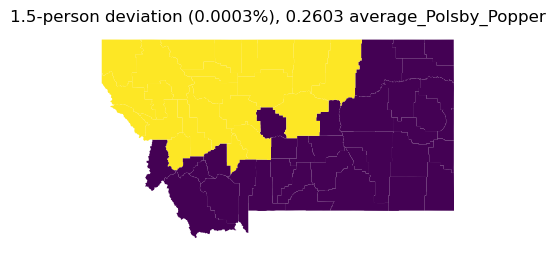

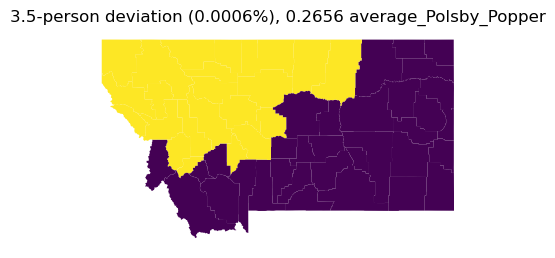

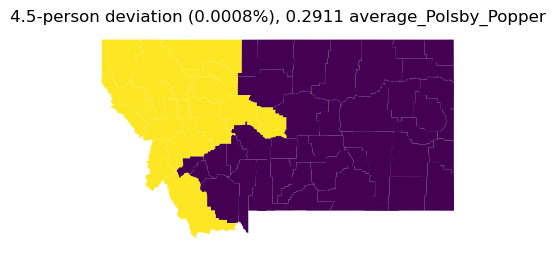

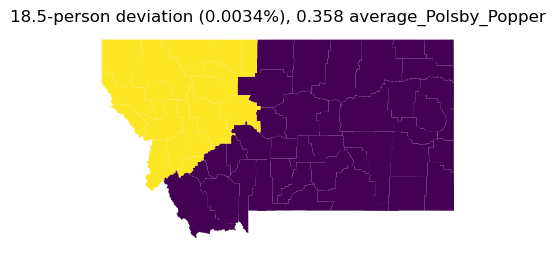

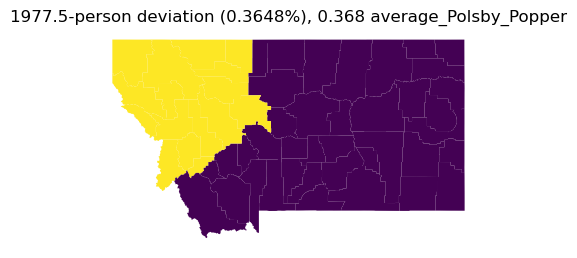

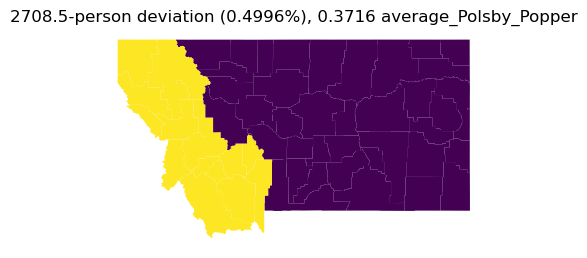

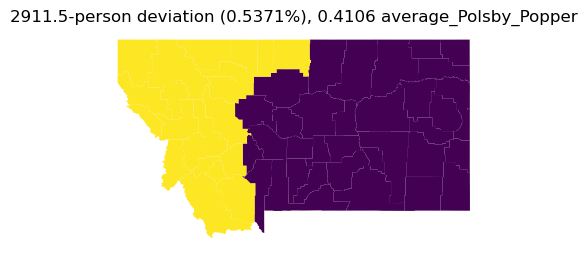

***************************************
obj_type = bottleneck_Polsby_Popper
***************************************
Pareto front objective values: [[0.5, 0.1729057709680653], [1.5, 0.21523974458553224], [3.5, 0.22474552149822258], [18.5, 0.3299606161244375], [1977.5, 0.34449106448122413]]


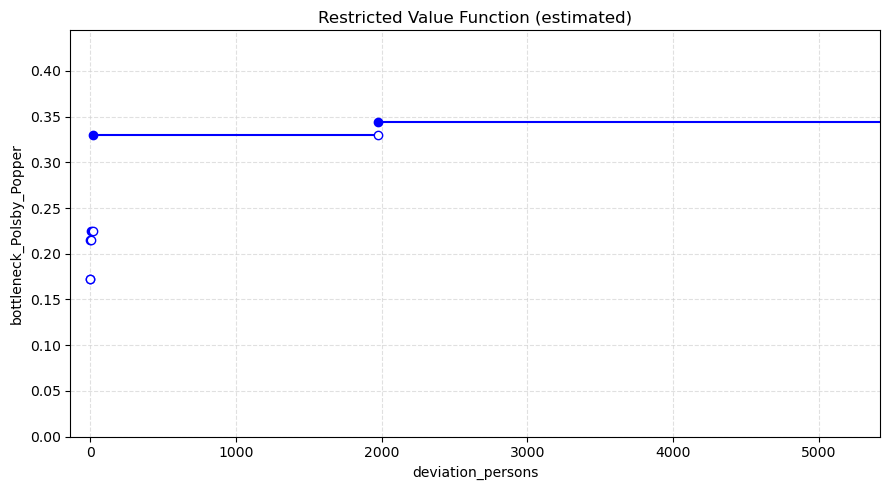

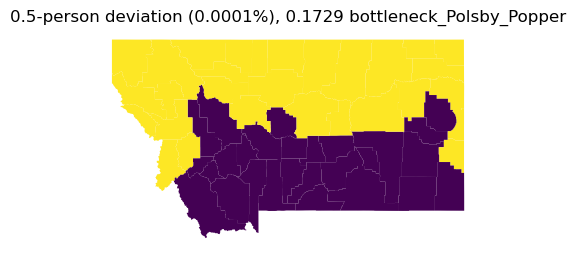

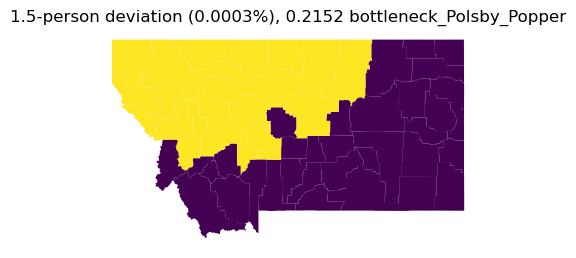

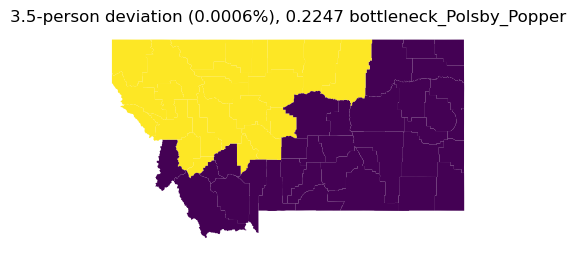

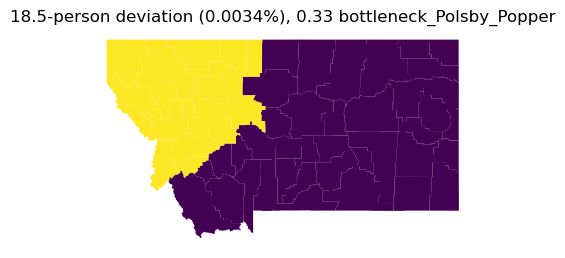

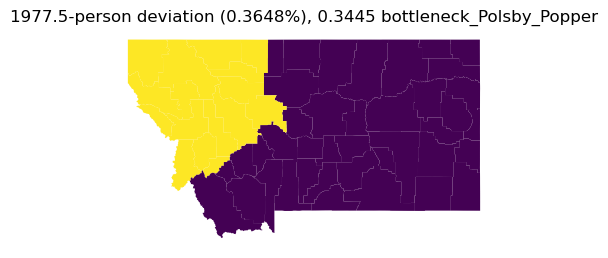

In [7]:
from pareto import plot_pareto_frontiers

obj_types = ['cut_edges', 'perimeter', 'inverse_Polsby_Popper', 'average_Polsby_Popper', 'bottleneck_Polsby_Popper']

pareto_plans = plot_pareto_frontiers(
                G,
                method='heuristic',
                plans=plans,                                   #if method ='epsilon_constraint_method' is None 
                obj_types=obj_types,                           #if method ='epsilon_constraint_method' is obj_type
                ideal_population=ideal_population,
                state=state,
                filepath=filepath,
                filename2=filename2,
                no_solution_region=no_solution_region,
                year=year,
                result=None,                                   #if method ='heuristic' is None 
             )

In [8]:
len(plans)

150

In [9]:
for obj_type in obj_types:
    print("***************************************")
    print("obj_type =", obj_type)
    print("***************************************")
    print("Pareto front plans:", pareto_plans[obj_type])

***************************************
obj_type = cut_edges
***************************************
Pareto front plans: [[[0, 1, 5, 6, 7, 10, 11, 12, 15, 16, 17, 19, 20, 21, 22, 24, 25, 27, 30, 32, 33, 34, 36, 37, 38, 41, 42, 43, 44, 45, 47, 48, 49, 51, 53, 54, 55], [2, 3, 4, 8, 9, 13, 14, 18, 23, 26, 28, 29, 31, 35, 39, 40, 46, 50, 52]], [[1, 5, 6, 7, 8, 9, 12, 14, 15, 16, 17, 18, 20, 21, 25, 27, 28, 29, 30, 31, 32, 33, 36, 37, 38, 39, 40, 41, 44, 45, 48, 49, 50, 52], [0, 2, 3, 4, 10, 11, 13, 19, 22, 23, 24, 26, 34, 35, 42, 43, 46, 47, 51, 53, 54, 55]], [[1, 5, 6, 7, 8, 9, 14, 15, 16, 17, 18, 20, 21, 25, 27, 28, 30, 31, 32, 33, 36, 37, 38, 39, 40, 41, 44, 45, 48, 49, 50, 52, 55], [0, 2, 3, 4, 10, 11, 12, 13, 19, 22, 23, 24, 26, 29, 34, 35, 42, 43, 46, 47, 51, 53, 54]], [[0, 1, 5, 6, 7, 8, 9, 11, 14, 15, 16, 17, 18, 20, 21, 24, 25, 27, 28, 29, 30, 32, 33, 34, 36, 37, 38, 39, 41, 42, 43, 44, 45, 48, 49, 50, 51, 52, 55], [2, 3, 4, 10, 12, 13, 19, 22, 23, 26, 31, 35, 40, 46, 47, 53, 54]]